## Introduction
This notebook explores the MNIST dataset using numpy and scikit-learn for classification tasks.
We will be building a simple baseline model using Bayes Decision Rule.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
import time

## Data Exploration


In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Convert to DataFrame
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['label'] = mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Exploratory Data Analysis (EDA)


In [3]:
# Display basic information about the dataset
mnist_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: float64(784), int64(1)
memory usage: 419.2 MB


In [4]:
# Display summary statistics
mnist_df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


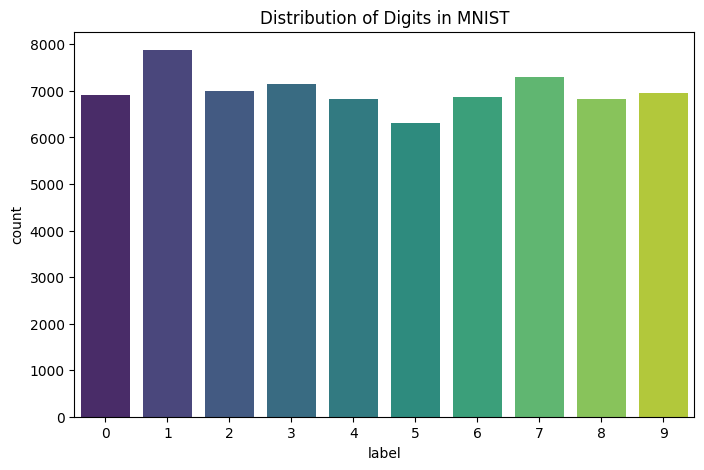

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=mnist_df, palette='viridis')
plt.title('Distribution of Digits in MNIST')
plt.show()

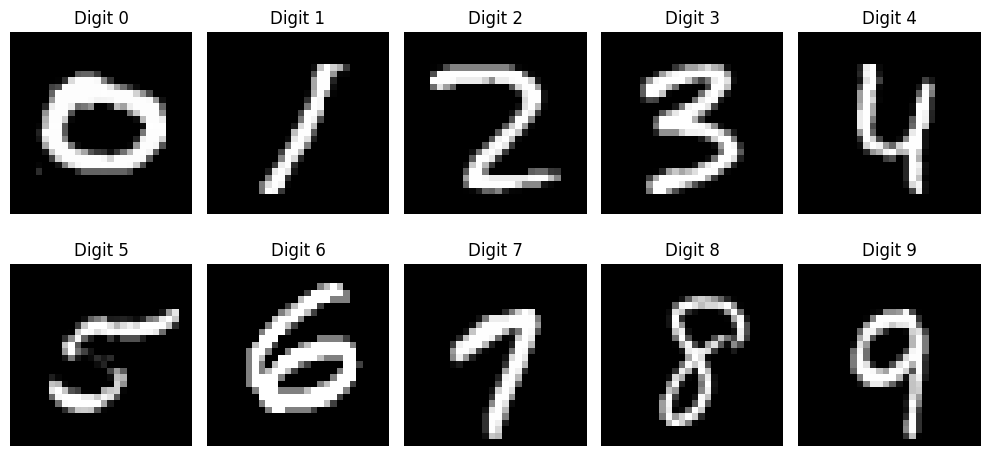

In [6]:
# Display a random sample of digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit = mnist_df[mnist_df['label'] == i].sample(1)
    digit_pixels = digit.drop('label', axis=1).values.reshape(28, 28)
    plt.imshow(digit_pixels, cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Data Preprocessing


In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
# normalize the data to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
num_classes = len(set(y_train))
num_classes

10

## Model Training

In [10]:
# Fit Gaussian distribution to each class
class_means = []
class_variances = []
for i in range(num_classes):
    indices = tf.where(y_train == i)
    class_images = tf.gather_nd(x_train, indices)
    class_mean = tf.reduce_mean(class_images, axis=0)
    class_variance = tf.reduce_mean(tf.math.square(class_images - class_mean))
    class_means.append(class_mean)
    class_variances.append(class_variance)

class_means= np.array(class_means)
class_variances= np.array(class_variances)

In [11]:
priors=[]
for i in range(num_classes):
  prior = np.mean(y_train == i, dtype=np.float64)
  priors.append(prior)
priors=np.array(priors)

Digit- 0 with prior:0.09751666666666667


Text(0.5, 1.0, 'Digit- 0 with prior:0.09751666666666667')

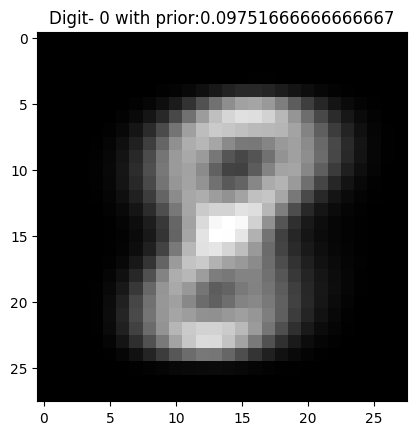

In [12]:
plt.imshow(class_means[8], cmap='gray')
title= "Digit- 0 with prior:"+ str(priors[8])
print(title)
plt.title(title)


In [13]:
for i, val in enumerate(class_variances):
    print("variance of",i,"is :",float(val))

variance of 0 is : 0.06367204997347763
variance of 1 is : 0.028667882316277718
variance of 2 is : 0.06474515546442113
variance of 3 is : 0.057326976747596445
variance of 4 is : 0.05213306694515074
variance of 5 is : 0.06069006827247376
variance of 6 is : 0.054963860830373044
variance of 7 is : 0.04779429016816974
variance of 8 is : 0.05815784024688648
variance of 9 is : 0.04919510270883864


In [14]:
for i, val in enumerate(priors):
    print("Prior of",i,"is :",float(val))

Prior of 0 is : 0.09871666666666666
Prior of 1 is : 0.11236666666666667
Prior of 2 is : 0.0993
Prior of 3 is : 0.10218333333333333
Prior of 4 is : 0.09736666666666667
Prior of 5 is : 0.09035
Prior of 6 is : 0.09863333333333334
Prior of 7 is : 0.10441666666666667
Prior of 8 is : 0.09751666666666667
Prior of 9 is : 0.09915


In [15]:
%%time
def bayesian_decision_rule(image):
    posterior_probs = []
    for i in range(num_classes):
        class_mean = class_means[i]
        class_variance = class_variances[i]
        likelihood = tf.reduce_prod(
            tf.math.exp(-tf.math.square(image - class_mean) / (2 * class_variance))
            / tf.math.sqrt(2 * math.pi * class_variance)
        )
        prior = priors[i]
        posterior_probs.append(likelihood * prior)

    return tf.argmax(posterior_probs)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.25 µs


## Model Evaluation

In [16]:
# Make predictions on the test set
%%time
predictions = []
for i in range(x_test.shape[0]):
    prediction = bayesian_decision_rule(x_test[i])
    predictions.append(prediction)

CPU times: user 1min 28s, sys: 3.52 s, total: 1min 31s
Wall time: 1min 35s


In [17]:
predictions = np.array(predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.08%


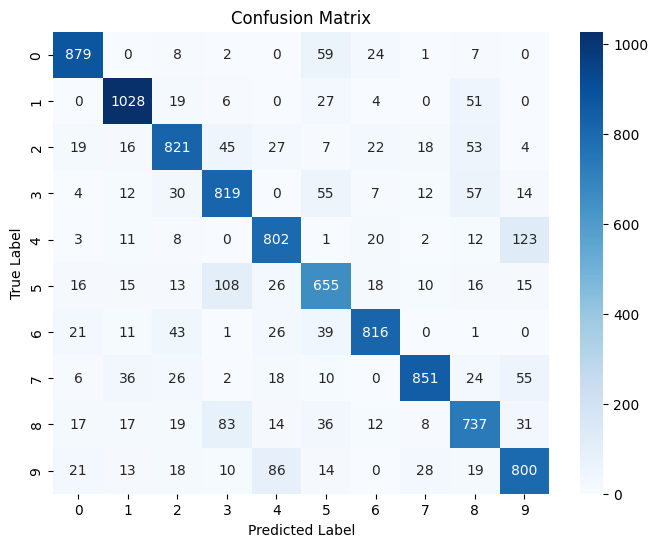

In [18]:
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8212


In [20]:
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       980
           1       0.89      0.91      0.90      1135
           2       0.82      0.80      0.81      1032
           3       0.76      0.81      0.79      1010
           4       0.80      0.82      0.81       982
           5       0.73      0.73      0.73       892
           6       0.88      0.85      0.87       958
           7       0.92      0.83      0.87      1028
           8       0.75      0.76      0.76       974
           9       0.77      0.79      0.78      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [21]:
es = accuracy_score(y_test, predictions)

# Calculate the margin of error
margin_of_error = 1.96 * np.sqrt(es * (1 - es) / len(y_test))

# Calculate the confidence interval
confidence_interval = (es - margin_of_error, es + margin_of_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (0.8132830138873615, 0.8283169861126385)
